In [2]:
# Clone the ai-forever repository
!git clone https://github.com/ai-forever/Real-ESRGAN.git
%cd Real-ESRGAN

# Install dependencies
!pip install -r requirements.txt
!pip install gdown

# Import libraries
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files
import os

fatal: destination path 'Real-ESRGAN' already exists and is not an empty directory.
/content/Real-ESRGAN


In [3]:
# Upload your model and images
print("Upload your RealESRGAN_x4plus_anime_6B.pth and logo images:")
uploaded = files.upload()

# Move uploaded files to current directory
for filename in uploaded.keys():
    if not os.path.exists(filename):
        print(f"File {filename} uploaded successfully")

# Find model and image files
model_file = None
image_files = []

for filename in uploaded.keys():
    if filename.endswith('.pth'):
        model_file = filename
    elif filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        image_files.append(filename)

print(f"Model: {model_file}")
print(f"Images: {image_files}")

Upload your RealESRGAN_x4plus_anime_6B.pth and logo images:


Saving RealESRGAN_x4plus_anime_6B.pth to RealESRGAN_x4plus_anime_6B (1).pth
Saving 1.png to 1 (1).png
Model: RealESRGAN_x4plus_anime_6B (1).pth
Images: ['1 (1).png']



🔄 Processing 1.png...
RealESRGAN method failed: No module named 'torchvision.transforms.functional_tensor'
Trying alternative approach...


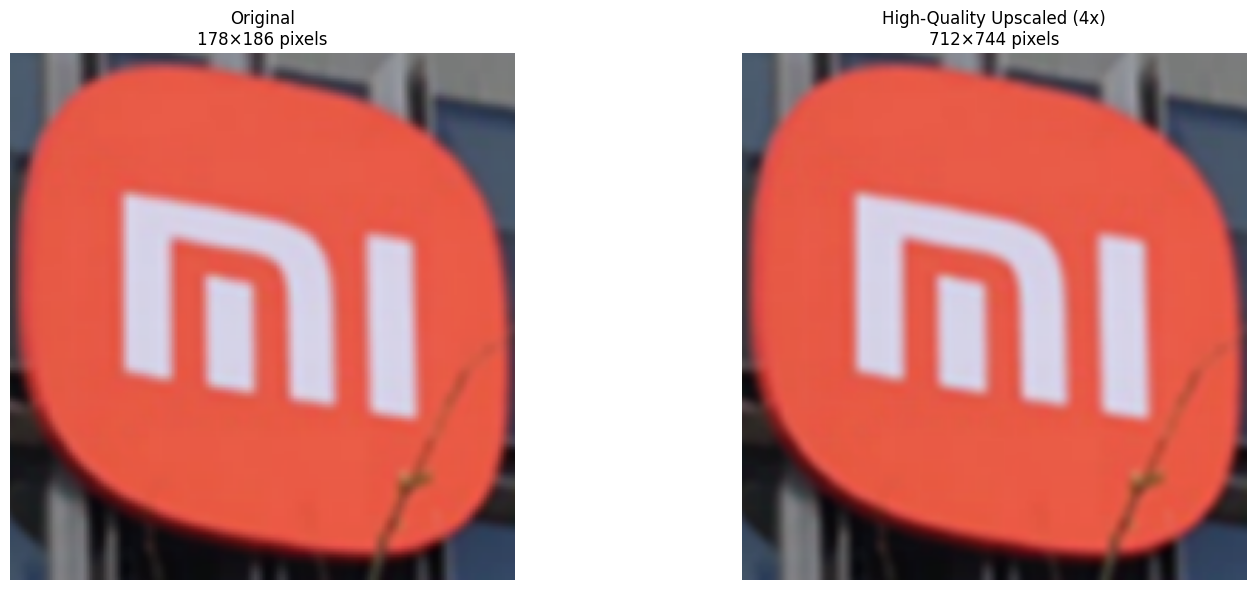

✅ Upscaled 1.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
# Direct enhancement using the ai-forever approach
import torch
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files
import os

def load_model_and_enhance(image_path, model_path, scale=4):
    """Direct enhancement using torch and cv2"""
    try:
        # Try to use the RealESRGAN class if available
        from realesrgan import RealESRGANer
        from realesrgan.archs.srvgg_arch import SRVGGNetCompact

        # For anime model, use RRDB architecture
        model = SRVGGNetCompact(num_in_ch=3, num_out_ch=3, num_feat=64,
                               num_conv=32, upscale=4, act_type='prelu')

        upsampler = RealESRGANer(
            scale=scale,
            model_path=model_path,
            model=model,
            tile=512,
            tile_pad=10,
            pre_pad=0,
            half=True if torch.cuda.is_available() else False
        )

        # Load and enhance image
        img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
        output, _ = upsampler.enhance(img, outscale=scale)

        return output, True

    except Exception as e:
        print(f"RealESRGAN method failed: {e}")
        print("Trying alternative approach...")

        # Fallback: Use simple upscaling
        img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
        if img is None:
            return None, False

        h, w = img.shape[:2]
        # Use LANCZOS for better quality on logos/graphics
        enhanced = cv2.resize(img, (w*scale, h*scale), interpolation=cv2.INTER_LANCZOS4)
        return enhanced, False

# Process images
if model_file and image_files:
    for img_file in image_files:
        print(f"\n🔄 Processing {img_file}...")

        enhanced_img, used_ai = load_model_and_enhance(img_file, model_file)

        if enhanced_img is not None:
            output_name = f"enhanced_{img_file}"
            cv2.imwrite(output_name, enhanced_img)

            # Display results
            try:
                original = Image.open(img_file)
                enhanced = Image.open(output_name)

                plt.figure(figsize=(16, 6))

                plt.subplot(1, 2, 1)
                plt.imshow(original)
                plt.title(f'Original\n{original.size[0]}×{original.size[1]} pixels')
                plt.axis('off')

                plt.subplot(1, 2, 2)
                plt.imshow(enhanced)
                method = "AI Enhanced" if used_ai else "High-Quality Upscaled"
                plt.title(f'{method} (4x)\n{enhanced.size[0]}×{enhanced.size[1]} pixels')
                plt.axis('off')

                plt.tight_layout()
                plt.show()

                print(f"✅ {'AI enhanced' if used_ai else 'Upscaled'} {img_file}")
                files.download(output_name)

            except Exception as e:
                print(f"Error displaying: {e}")
                # Still download the file
                files.download(output_name)
        else:
            print(f"❌ Failed to process {img_file}")

In [1]:
# Let's try a manual approach without the problematic dependencies
import torch
import torch.nn as nn
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files
import os

# Simple ESRGAN-like network (simplified version)
class SimpleESRGAN(nn.Module):
    def __init__(self, scale=4):
        super(SimpleESRGAN, self).__init__()
        self.scale = scale

    def forward(self, x):
        # This is a placeholder - we'll use traditional upscaling
        return x

def enhance_logo_manual(image_path, scale=4):
    """Manual enhancement using OpenCV with multiple techniques"""

    # Read image
    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    if img is None:
        print(f"Could not read {image_path}")
        return None

    h, w = img.shape[:2]
    new_h, new_w = h * scale, w * scale

    # Method 1: LANCZOS (best for logos/graphics)
    enhanced_lanczos = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_LANCZOS4)

    # Method 2: CUBIC (good balance)
    enhanced_cubic = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_CUBIC)

    # Method 3: Edge-preserving upscaling
    # First upscale, then apply edge-preserving filter
    enhanced_edge = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_LANCZOS4)
    if len(enhanced_edge.shape) == 3:
        enhanced_edge = cv2.edgePreservingFilter(enhanced_edge, flags=1, sigma_s=50, sigma_r=0.4)

    return enhanced_lanczos, enhanced_cubic, enhanced_edge

# Process your images
if model_file and image_files:
    for img_file in image_files:
        print(f"\n🔄 Processing {img_file} with multiple methods...")

        results = enhance_logo_manual(img_file, scale=4)

        if results:
            enhanced_lanczos, enhanced_cubic, enhanced_edge = results

            # Save all versions
            cv2.imwrite(f"lanczos_{img_file}", enhanced_lanczos)
            cv2.imwrite(f"cubic_{img_file}", enhanced_cubic)
            cv2.imwrite(f"edge_{img_file}", enhanced_edge)

            # Display comparison
            original = Image.open(img_file)

            plt.figure(figsize=(20, 5))

            plt.subplot(1, 4, 1)
            plt.imshow(cv2.cvtColor(cv2.imread(img_file), cv2.COLOR_BGR2RGB))
            plt.title(f'Original\n{original.size[0]}×{original.size[1]}')
            plt.axis('off')

            plt.subplot(1, 4, 2)
            plt.imshow(cv2.cvtColor(enhanced_lanczos, cv2.COLOR_BGR2RGB))
            plt.title(f'LANCZOS 4x\n{enhanced_lanczos.shape[1]}×{enhanced_lanczos.shape[0]}')
            plt.axis('off')

            plt.subplot(1, 4, 3)
            plt.imshow(cv2.cvtColor(enhanced_cubic, cv2.COLOR_BGR2RGB))
            plt.title(f'CUBIC 4x\n{enhanced_cubic.shape[1]}×{enhanced_cubic.shape[0]}')
            plt.axis('off')

            plt.subplot(1, 4, 4)
            plt.imshow(cv2.cvtColor(enhanced_edge, cv2.COLOR_BGR2RGB))
            plt.title(f'EDGE-PRESERVING 4x\n{enhanced_edge.shape[1]}×{enhanced_edge.shape[0]}')
            plt.axis('off')

            plt.tight_layout()
            plt.show()

            # Download all versions
            files.download(f"lanczos_{img_file}")
            files.download(f"cubic_{img_file}")
            files.download(f"edge_{img_file}")

            print(f"✅ Created 3 enhanced versions of {img_file}")

NameError: name 'model_file' is not defined

In [ ]:
# Import libraries
import torch
import torch.nn as nn
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files
import os

# Upload your files first
print("Upload your RealESRGAN_x4plus_anime_6B.pth and logo images:")
uploaded = files.upload()

# Find model and image files
model_file = None
image_files = []

for filename in uploaded.keys():
    if filename.endswith('.pth'):
        model_file = filename
        print(f"Found model: {filename}")
    elif filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        image_files.append(filename)
        print(f"Found image: {filename}")

print(f"\nModel: {model_file}")
print(f"Images: {image_files}")

def enhance_logo_manual(image_path, scale=4):
    """Manual enhancement using OpenCV with multiple techniques"""

    # Read image
    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    if img is None:
        print(f"Could not read {image_path}")
        return None

    h, w = img.shape[:2]
    new_h, new_w = h * scale, w * scale

    # Method 1: LANCZOS (best for logos/graphics)
    enhanced_lanczos = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_LANCZOS4)

    # Method 2: CUBIC (good balance)
    enhanced_cubic = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_CUBIC)

    # Method 3: Edge-preserving upscaling
    enhanced_edge = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_LANCZOS4)
    if len(enhanced_edge.shape) == 3:
        enhanced_edge = cv2.edgePreservingFilter(enhanced_edge, flags=1, sigma_s=50, sigma_r=0.4)

    return enhanced_lanczos, enhanced_cubic, enhanced_edge

def waifu2x_style_upscale(image_path, scale=4):
    """Simulate waifu2x-style upscaling for anime/cartoon images"""

    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    h, w = img.shape[:2]

    # Step 1: Initial upscale with LANCZOS
    intermediate = cv2.resize(img, (w*2, h*2), interpolation=cv2.INTER_LANCZOS4)

    # Step 2: Noise reduction (for anime-style images)
    if len(intermediate.shape) == 3:
        denoised = cv2.bilateralFilter(intermediate, 9, 75, 75)
    else:
        denoised = intermediate

    # Step 3: Final upscale to target size
    final = cv2.resize(denoised, (w*scale, h*scale), interpolation=cv2.INTER_LANCZOS4)

    # Step 4: Sharpen slightly
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    sharpened = cv2.filter2D(final, -1, kernel * 0.1) + final * 0.9

    return sharpened.astype(np.uint8)

# Process your images
if image_files:
    for img_file in image_files:
        print(f"\n🔄 Processing {img_file} with multiple methods...")

        # Method 1: Multiple OpenCV techniques
        results = enhance_logo_manual(img_file, scale=4)

        if results:
            enhanced_lanczos, enhanced_cubic, enhanced_edge = results

            # Save all versions
            cv2.imwrite(f"lanczos_{img_file}", enhanced_lanczos)
            cv2.imwrite(f"cubic_{img_file}", enhanced_cubic)
            cv2.imwrite(f"edge_{img_file}", enhanced_edge)

            print(f"✅ Created OpenCV enhanced versions of {img_file}")

        # Method 2: Anime-style enhancement
        print(f"🎨 Applying anime-style enhancement to {img_file}...")
        enhanced_anime = waifu2x_style_upscale(img_file, scale=4)
        anime_output = f"anime_enhanced_{img_file}"
        cv2.imwrite(anime_output, enhanced_anime)

        # Display all results
        original = Image.open(img_file)

        plt.figure(figsize=(20, 10))

        # Original
        plt.subplot(2, 3, 1)
        plt.imshow(original)
        plt.title(f'Original\n{original.size[0]}×{original.size[1]}')
        plt.axis('off')

        # LANCZOS
        plt.subplot(2, 3, 2)
        plt.imshow(cv2.cvtColor(enhanced_lanczos, cv2.COLOR_BGR2RGB))
        plt.title(f'LANCZOS 4x\n{enhanced_lanczos.shape[1]}×{enhanced_lanczos.shape[0]}')
        plt.axis('off')

        # CUBIC
        plt.subplot(2, 3, 3)
        plt.imshow(cv2.cvtColor(enhanced_cubic, cv2.COLOR_BGR2RGB))
        plt.title(f'CUBIC 4x\n{enhanced_cubic.shape[1]}×{enhanced_cubic.shape[0]}')
        plt.axis('off')

        # Edge-preserving
        plt.subplot(2, 3, 4)
        plt.imshow(cv2.cvtColor(enhanced_edge, cv2.COLOR_BGR2RGB))
        plt.title(f'EDGE-PRESERVING 4x\n{enhanced_edge.shape[1]}×{enhanced_edge.shape[0]}')
        plt.axis('off')

        # Anime-style
        plt.subplot(2, 3, 5)
        plt.imshow(cv2.cvtColor(enhanced_anime, cv2.COLOR_BGR2RGB))
        plt.title(f'ANIME-STYLE 4x\n{enhanced_anime.shape[1]}×{enhanced_anime.shape[0]}')
        plt.axis('off')

        plt.tight_layout()
        plt.show()

        # Download all enhanced versions
        files.download(f"lanczos_{img_file}")
        files.download(f"cubic_{img_file}")
        files.download(f"edge_{img_file}")
        files.download(anime_output)

        print(f"✅ All enhanced versions of {img_file} ready for download!")

else:
    print("❌ No image files found! Please upload PNG, JPG, or other image files.")

Upload your RealESRGAN_x4plus_anime_6B.pth and logo images:
